# Analysis de datos de un CCD

Una imagen astronómica es un array de 2 dimensiones, un píxel es un elemento del array. En un mundo ideal, el valor de cada píxel es directamente proporcional a la cantidad de luz que cayó sobre el píxel durante el.

El número almacenado en una imagen astronómica en crudo denominamos unidad digital analógica (Analog Digitla Unit, ADU) o "counts". El número de fotones (o equivalentes, electrones) que llegan al píxel está relacionado con los "counts" en el píxel a traves del factor de la ganancia "gain".

Otros contribuciones que aumenta los "counts", pero no estan relacionados con la luz son:
- **BIAS** Hay pequeñas variaciones en los valor del bias a lo largo del chip, y puede haber pequeñas variaciones en el nivel del bias con el tiempo.
- **Dark current** (Corriente oscuro) Causado en un píxel debido al movimiento térmico de los electrones en el CCD; la refrigeración de un CCD reduce, aunque no elimina del todo. La corriente oscuro depende en gran medida de la temperatura.
- **Read noise** (ruide de lectura) Causado un un píxel debido a la lecture. No se puede eliminar, pero reducir.
- **Flat** La sensidividad de la CCD varia a lo largo de la CCD causado por viñeteo en las escinas, particulas de polvo en los elementos opticos, cada pixel tiene su propio sensitividad, pixeles muertos.


In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
from astropy.visualization import ImageNormalize
from astropy.visualization import simple_norm, MinMaxInterval, PercentileInterval, ZScaleInterval

%matplotlib inline

In [2]:
from matplotlib import rcParams

rcParams["figure.figsize"] = (15, 7)
rcParams["font.size"] = 8

In [3]:
datapath = "C:/Users/Carlo/M55_LCO/"

## Imagenes de bias

Las imagenes de bias se toma con la CCD totalmente tapada sin luz ilumina la ccd y con un tiempo de exposicion 0s o sea simplemente leer la ccd instantanea. Ahora vamos a ver un ejemplo de un imagen de bias.

In [4]:
bias_name = "tfn0m414-kb95-20211231-0301-b00.fits.fz"

bias_hdu = fits.open( os.path.join(datapath,bias_name) )

In [5]:
bias_hdu.info()

Filename: C:/Users/Carlo/M55_LCO/tfn0m414-kb95-20211231-0301-b00.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 CompImageHDU    243   (3136, 2112)   int16   


In [6]:
bias_hdu[1].header

SIMPLE  =                    T / A valid FITS file                              
BITPIX  =                   16 / [bits] Bits per pixel                          
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3136 / [pixels]                                       
NAXIS2  =                 2112 / [pixels]                                       
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
BZERO   =        32768.0000000 / Number to offset data values by                
BSCALE  =            1.0000000 / Number to multiply data values by              
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '        

En vez de imprimir todo el header, podemos eligir solo la informacion que nos importa. Queremos verificar si se trata de una imagen de bias. Usamos el descriptor "Header keyword" `OBSTYPE`

In [7]:
print(bias_hdu[1].header["OBSTYPE"])
print(bias_hdu[1].header["EXPTIME"])

BIAS
-0.004


In [8]:
bias_image = bias_hdu[1].data


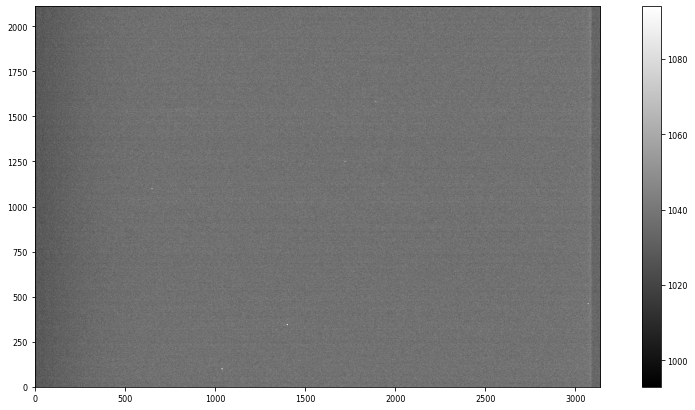

In [9]:
interval = ZScaleInterval()
norm = ImageNormalize(bias_image, interval=ZScaleInterval())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(bias_image, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

## Imagenes de dark

Las imagenes de bias se toma con la CCD totalmente tapada sin luz ilumina la ccd. Con la diferencia respeto al bias el dark tiene un tiempo de exposisicion diferente a 0, similar a la tiempo de exposicion. Ahora vamos a ver un ejemplo de un imagen de dark.

In [10]:
dark_name = "tfn0m414-kb95-20211231-0318-d00.fits.fz"
dark_hdu = fits.open( os.path.join(datapath, dark_name) )

In [11]:
print(dark_hdu[1].header["OBSTYPE"])
print(dark_hdu[1].header["EXPTIME"])

DARK
299.812


In [12]:
dark_image = dark_hdu[1].data

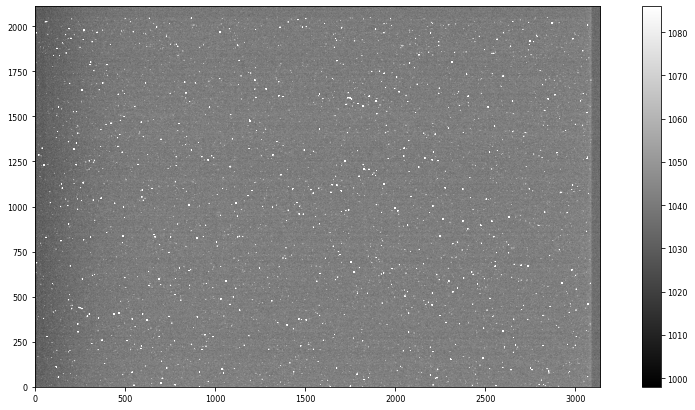

In [13]:
interval = ZScaleInterval()
norm = ImageNormalize(dark_image, interval=ZScaleInterval())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(dark_image, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

## Imagenes de flat

Las imagenes de bias se toma observando una superficie uniforme iluminado por ejemplo el cielo durante el dia o una pantalla blanco illuminado con una luz.

In [14]:
flat_name = "tfn0m414-kb95-20220101-0033-f00.fits.fz"
flat_hdu = fits.open( os.path.join(datapath, flat_name) )

In [15]:
print(flat_hdu[1].header["OBSTYPE"])
print(flat_hdu[1].header["FILTER"])
print(flat_hdu[1].header["EXPTIME"])

SKYFLAT
V
5.885


In [16]:
flat_image = flat_hdu[1].data

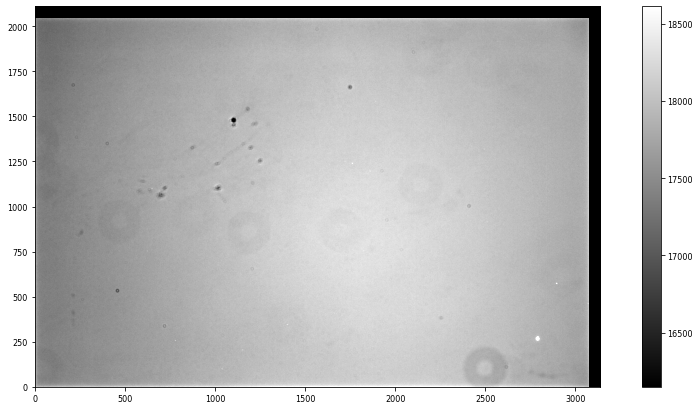

In [17]:
interval = ZScaleInterval()
norm = ImageNormalize(flat_image, interval=ZScaleInterval())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(flat_image, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

In [18]:
flat_name = "tfn0m414-kb95-20211230-0305-f00.fits.fz"
flat_hdu = fits.open( os.path.join(datapath, flat_name) )

In [19]:
print(flat_hdu[1].header["OBSTYPE"])
print(flat_hdu[1].header["FILTER"])
print(flat_hdu[1].header["EXPTIME"])

SKYFLAT
B
24.966


In [20]:
flat_image = flat_hdu[1].data

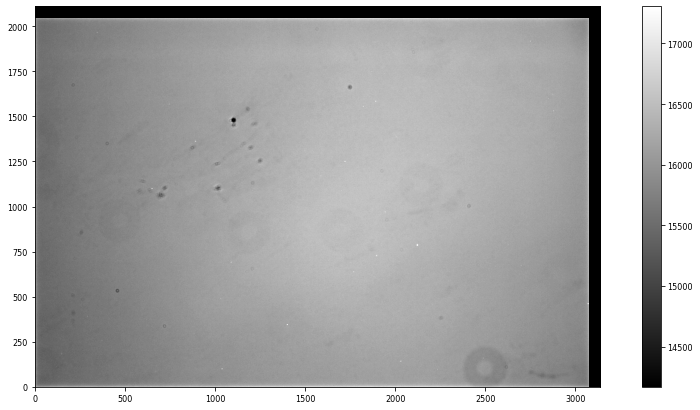

In [21]:
interval = ZScaleInterval()
norm = ImageNormalize(flat_image, interval=ZScaleInterval())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(flat_image, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

Las imagenes de bias, dark y flat llamamos generalmente imgenes de calibracion. Las usamos en un primer paso para mejorar nuestra imagen de ciencia. La imagen de ciencia es nuestro objeto que observamos.

## Imagenes de ciencia

Las imagenes de ciencia contiene nuestro objeto de interes. A las imagenes de ciencia aplicamos los imagenes de calibracion. 

In [22]:
science_name = "tfn0m414-kb95-20211231-0227-e00.fits.fz"
science_hdu = fits.open( os.path.join(datapath, science_name) )

In [23]:
print(science_hdu[1].header["OBSTYPE"])
print(science_hdu[1].header["FILTER"])
print(science_hdu[1].header["EXPTIME"])

EXPOSE
rp
180.276


In [24]:
science_image = science_hdu[1].data

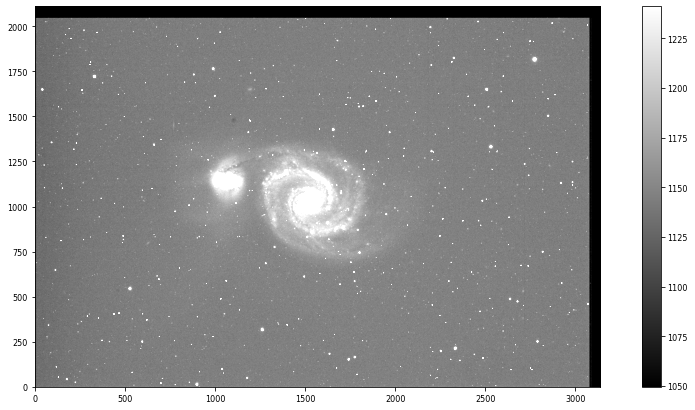

In [77]:
interval = ZScaleInterval()
norm = ImageNormalize(science_image, interval=ZScaleInterval())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(science_image, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

Ejercicio: Un programa que cuente los imagenes de cada uno (bias, dark, flat, ciencia).

In [71]:
# Escriba tu codigo aqui!!
datafiles = os.listdir(datapath)

count_bias = 0
count_dark = 0
count_flat = 0
count_ciencia = 0

for file in datafiles:
    image_name = file
    image_hdu = fits.open(os.path.join(datapath, image_name))
    #print(image_hdu.info())
    image_obstype = image_hdu[1].header["OBSTYPE"]
    #print(image_obstype)
    if image_obstype == "BIAS":
        count_bias += 1
    elif image_obstype == "SKYFLAT":
        count_flat += 1
    elif image_obstype == "DARK":
        count_dark += 1
    elif image_obstype == "EXPOSE":
        count_ciencia += 1

In [72]:
print(f"BIAS : {count_bias}")
print(f"FLAT : {count_flat}")
print(f"DARK : {count_dark}")
print(f"EXPOSED : {count_ciencia}")
print(f"TOTAL : {len(datafiles)}")

BIAS : 17
FLAT : 30
DARK : 5
EXPOSED : 3
TOTAL : 55
